# MovieLens 25M - ML Recommendation System 

## Data Exploration Notebook

This notebook explores the MovieLens 25M dataset in order to prepare the data for recommendation algorithms.

The MovieLens 25M dataset was collected directly from the MovieLens website (movielens.org), which is an online movie recommendation service operated by the GroupLens Research group at the University of Minnesota. It is not scraped from external sources like IMDb or TMDb; instead, it comes from user activity on MovieLens itself — ratings, tags, and interactions contributed by registered users. The dataset is available at this link: https://grouplens.org/datasets/movielens/25m/ 

Detailed breakdown of the data collected:

    - Ratings: 25 million ratings on a 5-star scale (from MovieLens users)

    - Tags: Over 1 million user-generated tags (from MovieLens users)

    - Movies metadata: Titles and genres, imported from The Movie Database (TMDb) for consistency.

    - Links: Cross-references to external IDs (IMDb and TMDb) are included in links.csv (supplementary identifiers, not the original source of ratings).

GroupLens Research at the University of Minnesota designed MovieLens (https://movielens.org) as both a public-facing recommender and a research platform. The User IDs were anonymized and the dataset was released for academic use. It contains essentially user-contributed behavioral data from MovieLens, enriched with metadata from TMDb and linked to IMDb for external reference.

The data was created by 162541 users between January 09, 1995 and November 21, 2019 and the dataset was generated on November 21, 2019. Users were selected at random for inclusion and all selected users had rated at least 20 movies. No demographic information is included in the dataset: each user is represented by an id, and no other information about them is provided.

# Exploratory Data Analysis

In [1]:
# Importing libraries for data manipulation, visualization, and analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The data is contained in several files as follows: genome-scores.csv, genome-tags.csv, links.csv, movies.csv, ratings.csv and tags.csv. Let's download them and explore.

In [2]:
# Loading data for exploratory data analysis
ratings = pd.read_csv("../raw/ratings.csv")
tags = pd.read_csv("../raw/tags.csv")
movies = pd.read_csv("../raw/movies.csv")
links = pd.read_csv("../raw/links.csv")
genome_tags = pd.read_csv("../raw/genome-tags.csv")
genome_scores = pd.read_csv("../raw/genome-scores.csv")

In [3]:
# Veryfing the shapes of the loaded datasets
print("Ratings:", ratings.shape)
print("Tags:", tags.shape)
print("Movies:", movies.shape)
print("Links:", links.shape)
print("Genome Tags:", genome_tags.shape)
print("Genome Scores:", genome_scores.shape)

Ratings: (25000095, 4)
Tags: (1093360, 4)
Movies: (62423, 3)
Links: (62423, 3)
Genome Tags: (1128, 2)
Genome Scores: (15584448, 3)


## Ratings

In [4]:
# Display first few rows of ratings dataset
display(ratings.head(10))

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


Timestamp is a numeric representation of a specific moment in time, here it is represents seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970 (which is the starting point, called the Unix epoch).
It is used for simplicity (computers prefer numbers over formatted dates), universality (UTC avoids time zone confusion) and precision (to store and calculate differences). For better understanding in our exploratory analysis, let's convert it to date-time format.

In [5]:
# Converting timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
# Extracting year and month from timestamp
ratings['year'] = ratings['timestamp'].dt.year
ratings['month'] = ratings['timestamp'].dt.month
# Display first few rows of ratings dataset with new columns
display(ratings.head(10))

,userId,movieId,rating,timestamp,year,month
0,1,296,5.0,2006-05-17 15:34:04,2006,5
1,1,306,3.5,2006-05-17 12:26:57,2006,5
2,1,307,5.0,2006-05-17 12:27:08,2006,5
3,1,665,5.0,2006-05-17 15:13:40,2006,5
4,1,899,3.5,2006-05-17 12:21:50,2006,5
5,1,1088,4.0,2006-05-17 12:21:35,2006,5
6,1,1175,3.5,2006-05-17 12:27:06,2006,5
7,1,1217,3.5,2006-05-17 15:05:26,2006,5
8,1,1237,5.0,2006-05-17 12:27:19,2006,5
9,1,1250,4.0,2006-05-17 12:20:14,2006,5


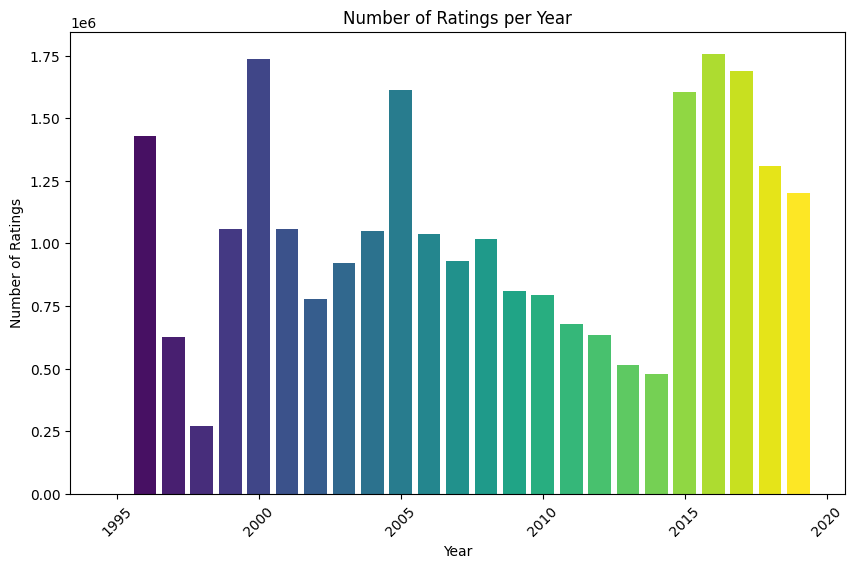

In [6]:
# Visualizing rating count per year
plt.figure(figsize=(10,6))
year_counts = ratings['year'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(year_counts)))
plt.bar(year_counts.index, year_counts.values, color=colors)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Year')
plt.show()

## Tags

In [7]:
# Display first few rows of tags dataset
display(tags.head(10))

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
5,4,44665,unreliable narrators,1573943619
6,4,115569,tense,1573943077
7,4,115713,artificial intelligence,1573942979
8,4,115713,philosophical,1573943033
9,4,115713,tense,1573943042


In [8]:
# Converting timestamp to datetime in tags dataset
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')
# Extracting year and month from timestamp
tags['year'] = tags['timestamp'].dt.year
# Display first few rows of tags dataset with converted timestamp
display(tags.head(10))

,userId,movieId,tag,timestamp,year
0,3,260,classic,2015-08-13 13:25:55,2015
1,3,260,sci-fi,2015-08-13 13:24:16,2015
2,4,1732,dark comedy,2019-11-16 22:33:18,2019
3,4,1732,great dialogue,2019-11-16 22:33:24,2019
4,4,7569,so bad it's good,2019-11-16 22:30:55,2019
5,4,44665,unreliable narrators,2019-11-16 22:33:39,2019
6,4,115569,tense,2019-11-16 22:24:37,2019
7,4,115713,artificial intelligence,2019-11-16 22:22:59,2019
8,4,115713,philosophical,2019-11-16 22:23:53,2019
9,4,115713,tense,2019-11-16 22:24:02,2019


## Movies

In [9]:
# Display first few rows of movies dataset
display(movies.head(10))

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


## Links

In [10]:
# Display first few rows of links dataset
display(links.head(10))

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


This file contains identifiers that can be used to link to other sources of movie data. Each line represents one movie, and has the following format:

    - movieId is an identifier for movies used by https://movielens.org (E.g., the movie Toy Story has the link https://movielens.org/movies/1)

    - imdbId is an identifier for movies used by http://www.imdb.com. (E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/)

    - tmdbId is an identifier for movies used by https://www.themoviedb.org (E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862)

## Tag Genome

There is a substantial difference between tags.csv and genome-tags.csv with respect to the notion of 'tag':

The file 'tags.csv' contains raw, user-contributed tags, where each row signifies one user applying a tag to one movie at a specific timestamp. These tags are free‑text strings (e.g., “sci-fi”, “romantic”, “slow”, “Oscar winner”).They can be inconsistent, misspelled or idiosyncratic because they come directly from users.

On the other hand, the file 'genome-tags.csv' contains the controlled vocabulary of tags used in the Tag Genome. Each tag here has a stable tagId and a canonical name. This vocabulary is curated and standardized, not raw free text. It’s designed to be machine‑interpretable and consistent across movies.

There might be some overlap (many genome tags were inspired by frequent user tags), but the genome set is cleaned, standardized, and extended to cover all movies consistently.

In [11]:
# Display first few rows of genome_tags dataset 
display(genome_tags.head())

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


Based on a large vocabulary of descriptive words/phrases (from Tag Genome) describing movies in fine detail, nuanced aspects of movies were captured: factors that go beyond traditional genres and categories. They allowed to compute the genome scores, which quantify the relevance of each tag to each movie. They encode how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews. The authors of this computation wish to cite the following source for reference: 
    
    Jesse Vig, Shilad Sen, and John Riedl. 2012. The Tag Genome: Encoding Community Knowledge to Support Novel Interaction. ACM Trans. Interact. Intell. Syst. 2, 3: 13:1–13:44. https://doi.org/10.1145/2362394.2362395

In [12]:
# Display first few rows of genome_scores dataset
display(genome_scores.head(10))


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
5,1,6,0.14675
6,1,7,0.06350
7,1,8,0.20375
8,1,9,0.20200
9,1,10,0.03075


A genome score is a numeric value that represents how strongly a particular descriptive tag (like “dark comedy” or “sci‑fi”) is relevant to a given movie. It’s essentially a tag–movie relevance score (as explained here above, it is a value computed using machine learning models trained on user ratings, tags, and other metadata). This makes the dataset much richer: every movie has scores for every tag which allows to turn sparse user tags into a dense, interpretable feature set for recommendation models.

## Exploring Distributions and Other Statistics

In [13]:
# Ratings distribution
ratings['rating'].value_counts().sort_index()

rating
0.5     393068
1.0     776815
1.5     399490
2.0    1640868
2.5    1262797
3.0    4896928
3.5    3177318
4.0    6639798
4.5    2200539
5.0    3612474
Name: count, dtype: int64

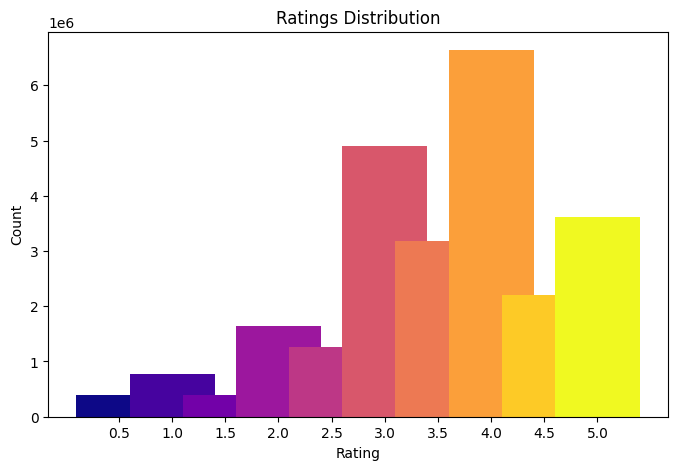

In [14]:
# Visualizing ratings distribution
plt.figure(figsize=(8,5))
rating_counts = ratings['rating'].value_counts().sort_index()
colors = plt.cm.plasma(np.linspace(0, 1, len(rating_counts)))
plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.xticks(rating_counts.index)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings Distribution')
plt.show()

In [15]:
# Ratings per user
ratings.groupby('userId').size().describe()

count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
25%          36.000000
50%          71.000000
75%         162.000000
max       32202.000000
dtype: float64

From the figures above, we can see how active are the considered users in this dataset: only users that issued 20+ ratings are taken into account, on average they generate 153 ratings, with the maximum of over 32k ratings. This distribution allows to train recommendation algorithms that are based on these user ratings focusing on similarity between user profiles so obviously this kind of information is very valuable for the recommendation engine creation at a later stage.

In [16]:
# Ratings per movie
ratings.groupby('movieId').size().describe()

count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      81491.000000
dtype: float64

Here we see that half of the movies (50%) get only 6 ratings or less, the movies with a significant number of ratings are rather rare (even if the mean suggests the contrary: 423 ratings per movie). This gives a weaker background for recommendation (comparing to user - based data), but this would not be an obstacle for building a ML model as we will see further in this notebook.

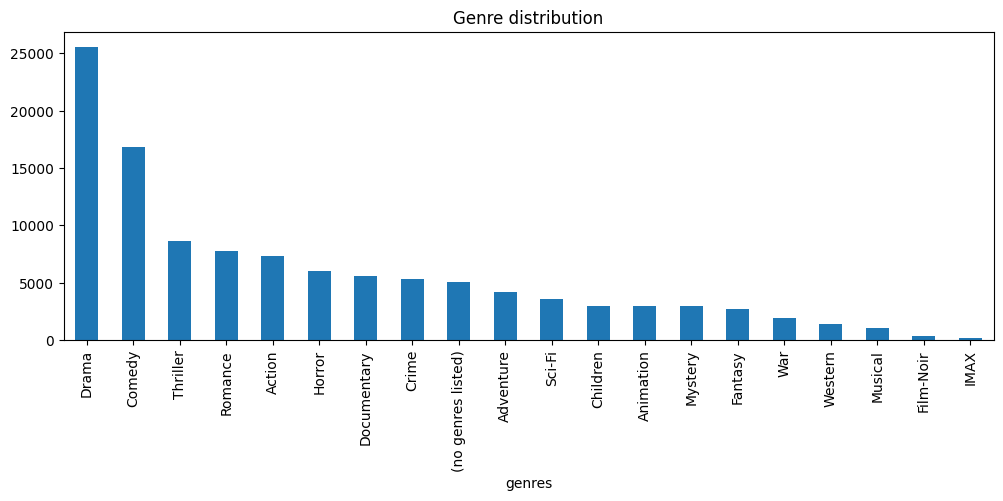

In [17]:
# Genre frequency
movies['genres'].str.split('|').explode().value_counts().plot(kind='bar', figsize=(12,4))
plt.title("Genre distribution")
plt.show()


In [18]:
# Links coverage
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [19]:
# Genome scores sample - this gives an idea of relevance score distribution per tag, for feature engineering purposes, 
# for tag-based recommendations
genome_scores.groupby('tagId')['relevance'].describe().head()

,count,mean,std,min,25%,50%,75%,max
tagId,,,,,,,,
1,13816.0,0.046596,0.071478,0.00700,0.02575,0.03375,0.045312,0.99975
2,13816.0,0.044771,0.062601,0.00725,0.02675,0.03475,0.047250,1.00000
3,13816.0,0.078292,0.111595,0.00600,0.02875,0.04200,0.079500,0.99775
4,13816.0,0.085599,0.086021,0.01000,0.03725,0.05600,0.102250,0.92200
5,13816.0,0.129250,0.146648,0.01725,0.05325,0.07825,0.136000,0.98800


Interpretation for tagId==1 of the a/m statistics:

tagId 1: '007' (on the basis of the tags.csv displayed here above)

    - count: 13,816 - This tag has relevance scores for 13,816 movies
    - mean: 0.0466 - On average, this tag has very low relevance across movies (scale is 0-1)
    - std: 0.0715 - Standard deviation shows moderate variability in how relevant this tag is to different movies
    - min: 0.007 - The lowest relevance score is 0.007 (almost irrelevant)
    - 25%: 0.0258 - 25% of movies have relevance ≤ 0.0258
    - 50% (median): 0.0338 - Half of movies score below 0.0338 for this tag
    - 75%: 0.0453 - 75% of movies score below 0.0453
    - max: 0.9998 - At least one movie is highly relevant to this tag (almost perfect score)

Key Insight: This tag is generally not very relevant to most movies (low mean), but there's at least one movie where it's extremely relevant (high max). The relatively high standard deviation compared to the mean suggests this tag is highly discriminative - it strongly applies to a few specific movies but not to most others.

This makes it a potentially valuable feature for content-based recommendation, as it can help identify niche characteristics that distinguish certain movies.

In [20]:
# Users with few ratings
user_activity = ratings.groupby('userId').size()
print("Users with <20 ratings:", (user_activity < 20).sum())

Users with <20 ratings: 0


Only users that issued at least 20 ratings are considered in this dataset.

In [21]:
# Movies with few ratings
movie_activity = ratings.groupby('movieId').size()
print("Movies with <20 ratings:", (movie_activity < 20).sum())

Movies with <20 ratings: 40617


## Data Quality & Missing Values

In [22]:
# Checking for missing values in all datasets
print("Missing values in Ratings:")
print(ratings.isnull().sum())
print("\nMissing values in Tags:")
print(tags.isnull().sum())
print("\nMissing values in Movies:")
print(movies.isnull().sum())
print("\nMissing values in Links:")
print(links.isnull().sum())
print("\nMissing values in Genome Tags:")
print(genome_tags.isnull().sum())
print("\nMissing values in Genome Scores:")
print(genome_scores.isnull().sum())

Missing values in Ratings:
userId       0
movieId      0
rating       0
timestamp    0
year         0
month        0
dtype: int64

Missing values in Tags:
userId        0
movieId       0
tag          16
timestamp     0
year          0
dtype: int64

Missing values in Movies:
movieId    0
title      0
genres     0
dtype: int64

Missing values in Links:
movieId      0
imdbId       0
tmdbId     107
dtype: int64

Missing values in Genome Tags:
tagId    0
tag      0
dtype: int64

Missing values in Genome Scores:
movieId      0
tagId        0
relevance    0
dtype: int64


In [23]:
# Checking for duplicate entries
print("Duplicate rows in Ratings:", ratings.duplicated().sum())
print("Duplicate rows in Tags:", tags.duplicated().sum())
print("Duplicate rows in Movies:", movies.duplicated().sum())
print("Duplicate rows in Links:", links.duplicated().sum())
print("Duplicate rows in Genome Tags:", genome_tags.duplicated().sum())
print("Duplicate rows in Genome Scores:", genome_scores.duplicated().sum())

Duplicate rows in Ratings: 0
Duplicate rows in Tags: 0
Duplicate rows in Movies: 0
Duplicate rows in Links: 0
Duplicate rows in Genome Tags: 0
Duplicate rows in Genome Scores: 0


In [24]:
# Data consistency check: verify all movieIds in ratings exist in movies
movies_in_ratings = set(ratings['movieId'].unique())
movies_in_catalog = set(movies['movieId'].unique())
print(f"Movies in ratings: {len(movies_in_ratings)}")
print(f"Movies in catalog: {len(movies_in_catalog)}")
print(f"Movies rated but not in catalog: {len(movies_in_ratings - movies_in_catalog)}")
print(f"Movies in catalog but never rated: {len(movies_in_catalog - movies_in_ratings)}")

Movies in ratings: 59047
Movies in catalog: 62423
Movies rated but not in catalog: 0
Movies in catalog but never rated: 3376


In [25]:
# Timestamp range analysis
print("Rating timestamps range:")
print(f"First rating: {ratings['timestamp'].min()}")
print(f"Last rating: {ratings['timestamp'].max()}")
print(f"Time span: {(ratings['timestamp'].max() - ratings['timestamp'].min()).days} days")
print(f"\nTag timestamps range:")
print(f"First tag: {tags['timestamp'].min()}")
print(f"Last tag: {tags['timestamp'].max()}")

Rating timestamps range:
First rating: 1995-01-09 11:46:49
Last rating: 2019-11-21 09:15:03
Time span: 9081 days

Tag timestamps range:
First tag: 2005-12-24 13:00:10
Last tag: 2019-11-21 06:11:36


## Advanced Rating Analysis

In [26]:
# Rating bias: Average rating per user
user_avg_rating = ratings.groupby('userId')['rating'].mean()
print("User rating bias statistics:")
print(user_avg_rating.describe())

User rating bias statistics:
count    162541.000000
mean          3.679205
std           0.477368
min           0.500000
25%           3.398747
50%           3.700000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


Interpretation:

The average rating each user gives across all their rated movies (identifying "harsh" vs "generous" raters):

    count: 162,541 - Total number of users in the dataset
    mean: 3.68 - The average user gives ratings around 3.68 stars (slightly positive bias overall)
    std: 0.48 - Users vary moderately in their rating tendencies (some are consistently harsh/generous)
    min: 0.5 - The harshest user averages only 0.5 stars (extremely critical)
    25%: 3.40 - 25% of users average ≤3.40 stars (below-average raters)
    50% (median): 3.70 - Half of users give average ratings below 3.70
    75%: 4.00 - 75% of users average ≤4.00 stars
    max: 5.0 - At least one user gives perfect 5-star ratings to everything (extremely generous)

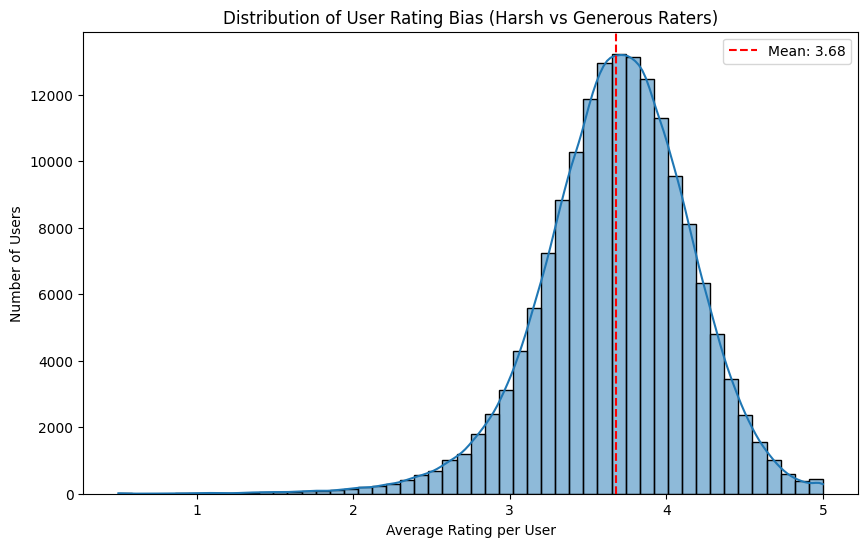

In [27]:
# Visualize distribution
plt.figure(figsize=(10,6))
sns.histplot(user_avg_rating, bins=50, kde=True)
plt.xlabel('Average Rating per User')
plt.ylabel('Number of Users')
plt.title('Distribution of User Rating Bias (Harsh vs Generous Raters)')
plt.axvline(user_avg_rating.mean(), color='red', linestyle='--', label=f'Mean: {user_avg_rating.mean():.2f}')
plt.legend()
plt.show()

Key Insights:

Positive skew: Most users tend to rate movies they watch positively (mean ~3.7 on a 0-5 scale)

Rating inflation: Users generally rate higher than the scale midpoint (2.5), suggesting they watch movies they expect to like

User bias matters: The 0.48 standard deviation means some users are consistently ~0.5 stars more generous/harsh than others - this is important for collaborative filtering algorithms which need to normalize for user bias

Wide range: The difference between min (0.5) and max (5.0) shows extreme variation in rating tendencies

For recommendation algorithms: This suggests we will need to account for user rating bias - perhaps by normalizing ratings or using algorithms that handle different user "calibrations" effectively.

In [28]:
# Rating trends over time
yearly_avg_rating = ratings.groupby('year')['rating'].mean()
monthly_ratings = ratings.groupby(['year', 'month'])['rating'].agg(['mean', 'count'])

print("Average rating by year:")
print(yearly_avg_rating)

Average rating by year:
year
1995    3.666667
1996    3.545700
1997    3.587665
1998    3.512791
1999    3.616826
2000    3.575065
2001    3.532356
2002    3.485714
2003    3.476976
2004    3.430770
2005    3.433530
2006    3.466669
2007    3.472347
2008    3.538081
2009    3.505708
2010    3.528080
2011    3.554928
2012    3.614677
2013    3.652584
2014    3.610965
2015    3.556767
2016    3.531187
2017    3.546107
2018    3.564040
2019    3.576350
Name: rating, dtype: float64


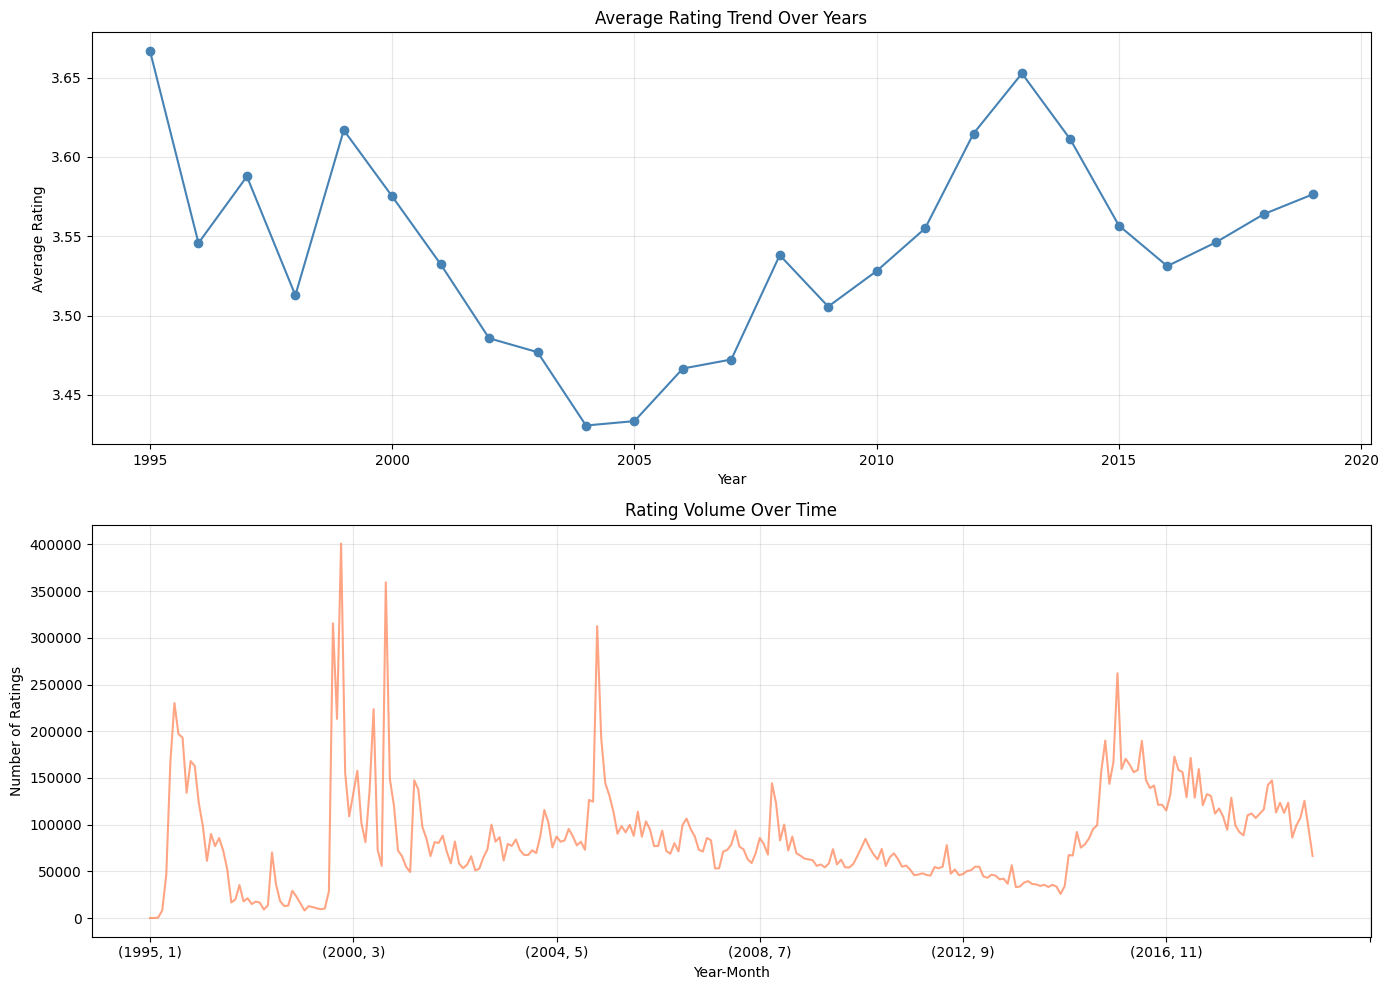

In [29]:
# Visualize
fig, axes = plt.subplots(2, 1, figsize=(14,10))

# Yearly trend
yearly_avg_rating.plot(ax=axes[0], marker='o', color='steelblue')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Rating')
axes[0].set_title('Average Rating Trend Over Years')
axes[0].grid(True, alpha=0.3)

# Monthly volume
monthly_ratings['count'].plot(ax=axes[1], color='coral', alpha=0.7)
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Number of Ratings')
axes[1].set_title('Rating Volume Over Time')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
# Rating matrix sparsity
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
n_ratings = len(ratings)
possible_ratings = n_users * n_movies
sparsity = 1 - (n_ratings / possible_ratings)

print(f"Number of users: {n_users:,}")
print(f"Number of movies: {n_movies:,}")
print(f"Number of ratings: {n_ratings:,}")
print(f"Possible ratings: {possible_ratings:,}")
print(f"Matrix sparsity: {sparsity:.4%}")
print(f"Matrix density: {(1-sparsity):.4%}")

Number of users: 162,541
Number of movies: 59,047
Number of ratings: 25,000,095
Possible ratings: 9,597,558,427
Matrix sparsity: 99.7395%
Matrix density: 0.2605%


Interpretation:

The above figures (the Matrix sparsity) show how "empty" the user-movie rating matrix is - i.e., what percentage of all possible user-movie combinations have NOT been rated.

The Numbers:

    Number of users: 162,541 - Total unique users
    Number of movies: 59,047 - Total unique movies in the catalog
    Number of ratings: 25,000,095 - Actual ratings that exist (~25 million)
    Possible ratings: 9,597,558,427 - If every user rated every movie (162,541 × 59,047 = ~9.6 billion)
    Matrix sparsity: 99.74% - Almost the entire matrix is EMPTY (ver few ratings)
    Matrix density: 0.26% - Only 0.26% of all possible ratings actually exist

Key Insight - Extreme sparsity: 

The rating matrix is 99.74% empty, even with 25 million ratings, it's a tiny fraction (0.26%) of what's theoretically possible (~9.6 billion possible ratings). Each user has rated only ~154 movies out of 59,047 available which covers only 0.26% of all possibilities. This poses a cold start problem (most user-movie pairs have never been rated, making direct collaborative filtering challenging). 

For Recommendation Algorithms this extreme sparsity means:

- Matrix factorization techniques (like SVD, NMF) are ideal - they handle sparse data well

- Content-based filtering using genres/tags becomes valuable since many movies lack sufficient ratings

- Hybrid approaches combining collaborative + content-based will likely perform best

- Cold start is a real challenge for new users or rarely-rated movies

- Dimensionality reduction is critical to find latent patterns in this sparse space


## Genre Analysis

In [31]:
# Number of genres per movie
movies['genre_count'] = movies['genres'].str.split('|').str.len()
print("Genres per movie statistics:")
print(movies['genre_count'].describe())

Genres per movie statistics:
count    62423.000000
mean         1.799129
std          0.963300
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: genre_count, dtype: float64


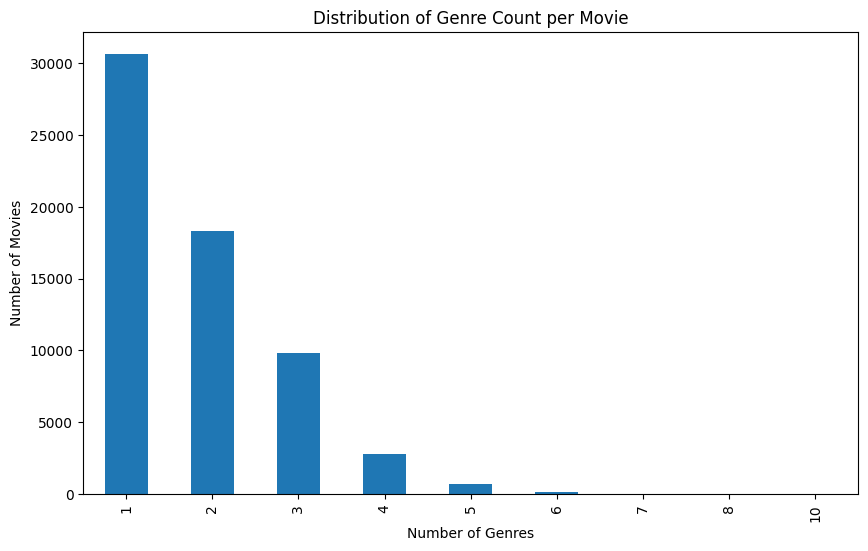


Movies with no genre listed: 5062


In [32]:
# Visualize
plt.figure(figsize=(10,6))
movies['genre_count'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.title('Distribution of Genre Count per Movie')
plt.show()

print(f"\nMovies with no genre listed: {(movies['genres'] == '(no genres listed)').sum()}")

In [33]:
# Genre co-occurrence analysis
from itertools import combinations
import pandas as pd

# Extract all genre pairs
genre_pairs = []
for genres in movies['genres']:
    if genres != '(no genres listed)':
        genre_list = genres.split('|')
        if len(genre_list) > 1:
            genre_pairs.extend(list(combinations(sorted(genre_list), 2)))

# Count co-occurrences
genre_pair_counts = pd.Series(genre_pairs).value_counts().head(15)
print("Top 15 genre combinations:")
print(genre_pair_counts)


Top 15 genre combinations:
(Drama, Romance)       4654
(Comedy, Drama)        4603
(Drama, Thriller)      3510
(Comedy, Romance)      3450
(Crime, Drama)         2996
(Action, Drama)        2406
(Action, Thriller)     2209
(Horror, Thriller)     2181
(Crime, Thriller)      2065
(Action, Adventure)    1652
(Mystery, Thriller)    1466
(Action, Crime)        1423
(Drama, War)           1348
(Action, Comedy)       1333
(Drama, Mystery)       1292
Name: count, dtype: int64


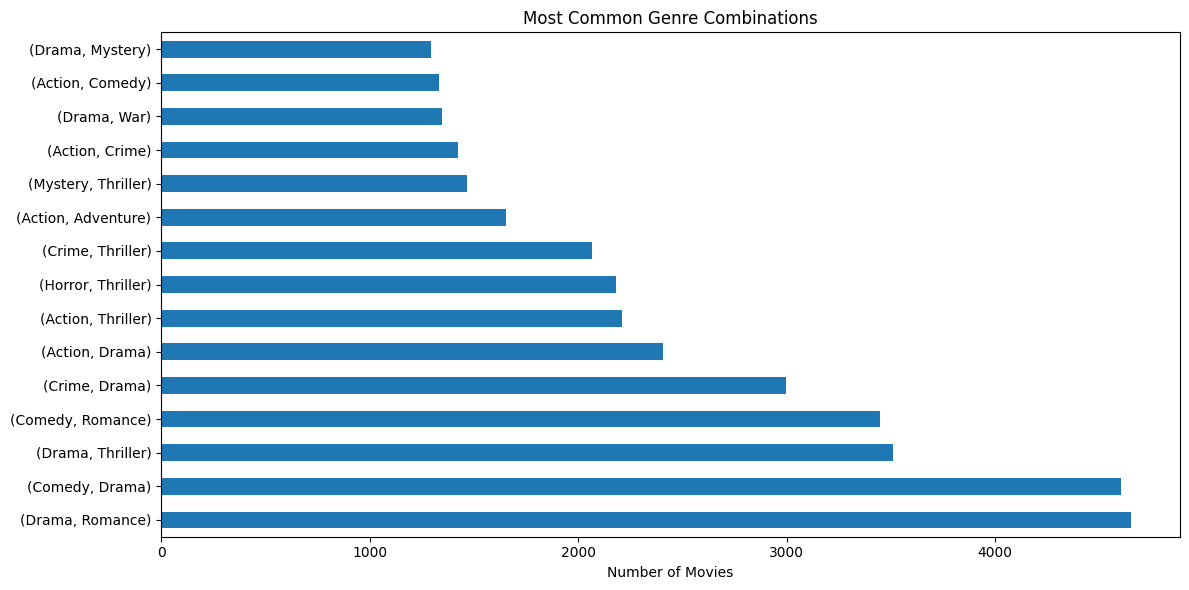

In [34]:
# Visualize
plt.figure(figsize=(12,6))
genre_pair_counts.plot(kind='barh')
plt.xlabel('Number of Movies')
plt.title('Most Common Genre Combinations')
plt.tight_layout()
plt.show()

In [35]:
# Average rating per genre
# Merge ratings with movies to get genres
ratings_with_genres = ratings.merge(movies[['movieId', 'genres']], on='movieId')

In [36]:
# Explode genres and calculate average rating
genre_ratings = ratings_with_genres.copy()
genre_ratings['genre'] = genre_ratings['genres'].str.split('|')
genre_ratings = genre_ratings.explode('genre')
genre_avg_rating = genre_ratings.groupby('genre')['rating'].agg(['mean', 'count']).sort_values('mean', ascending=False)

print("Average rating by genre (with rating count):")
print(genre_avg_rating)

Average rating by genre (with rating count):
                        mean     count
genre                                 
Film-Noir           3.925728    247227
War                 3.791466   1267346
Documentary         3.705281    322449
Crime               3.685044   4190259
Drama               3.677185  10962833
Mystery             3.670169   2010995
Animation           3.614946   1630987
IMAX                3.603712   1063279
Western             3.585755    483731
Musical             3.554716    964252
Romance             3.542712   4497291
Thriller            3.522964   6763272
Adventure           3.517445   5832424
Fantasy             3.511589   2831585
Sci-Fi              3.478143   4325740
Action              3.466592   7446918
Children            3.432507   2124258
Comedy              3.423993   8926230
(no genres listed)  3.326379     26627
Horror              3.293563   1892183


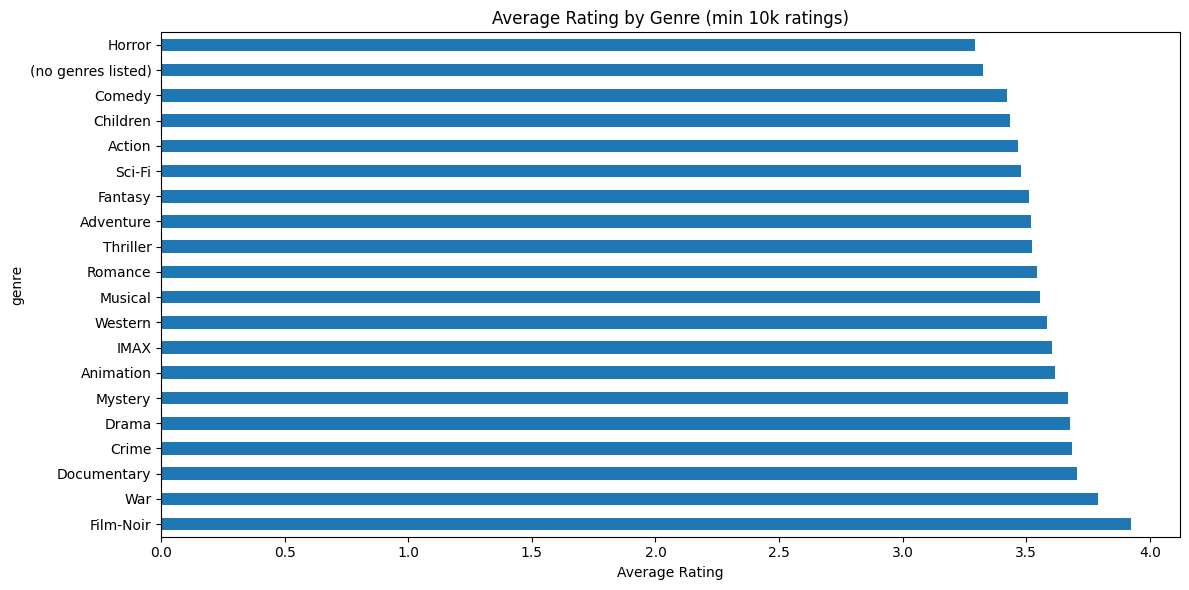

In [37]:
# Visualize
plt.figure(figsize=(12,6))
genre_avg_rating[genre_avg_rating['count'] > 10000]['mean'].plot(kind='barh')
plt.xlabel('Average Rating')
plt.title('Average Rating by Genre (min 10k ratings)')
plt.tight_layout()
plt.show()

In [38]:
# Genre popularity over time
genre_year_counts = genre_ratings.groupby(['year', 'genre']).size().reset_index(name='count')

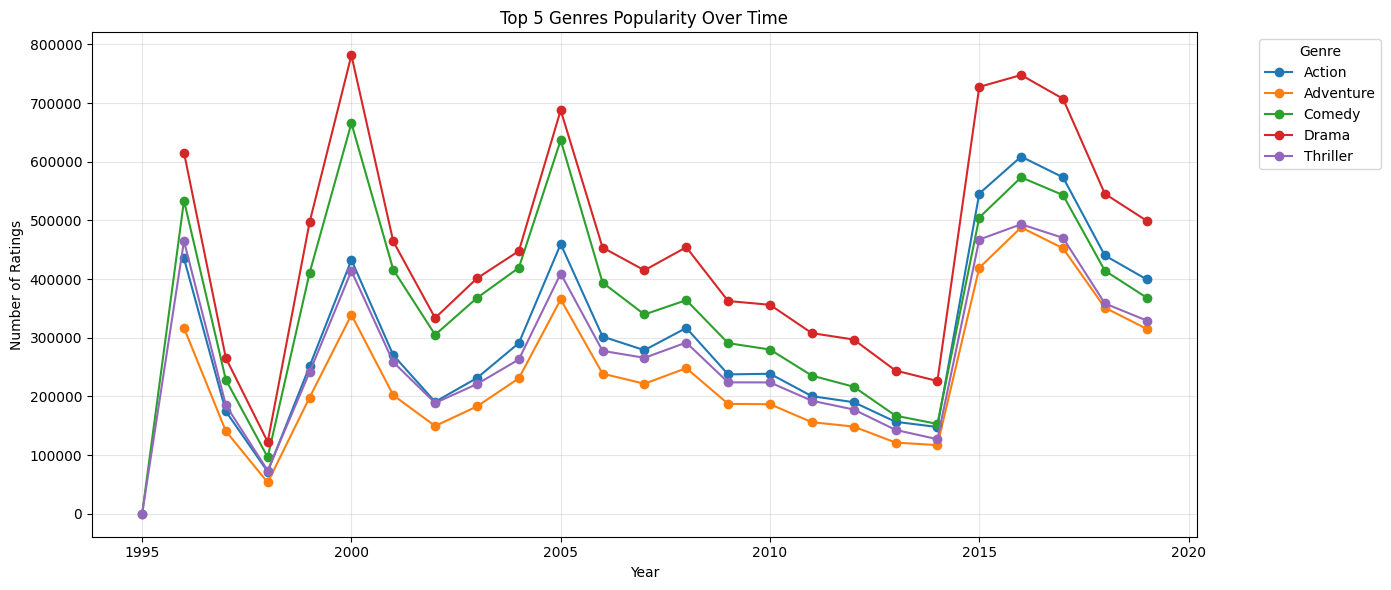

In [39]:
# Plot top 5 genres over time
top_genres = genre_ratings['genre'].value_counts().head(5).index
genre_year_pivot = genre_year_counts[genre_year_counts['genre'].isin(top_genres)].pivot(index='year', columns='genre', values='count')

plt.figure(figsize=(14,6))
genre_year_pivot.plot(ax=plt.gca(), marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Top 5 Genres Popularity Over Time')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Tags Analysis

In [40]:
# Most common user tags
tag_freq = tags['tag'].str.lower().value_counts().head(20)
print("Top 20 most common tags:")
print(tag_freq)

Top 20 most common tags:
tag
sci-fi                8795
atmospheric           7053
action                6783
comedy                6366
surreal               5584
funny                 5354
based on a book       5194
twist ending          4904
visually appealing    4691
romance               4458
dystopia              4329
dark comedy           4133
quirky                3999
bd-r                  3966
thought-provoking     3847
fantasy               3816
stylized              3758
classic               3733
psychology            3646
nudity (topless)      3590
Name: count, dtype: int64


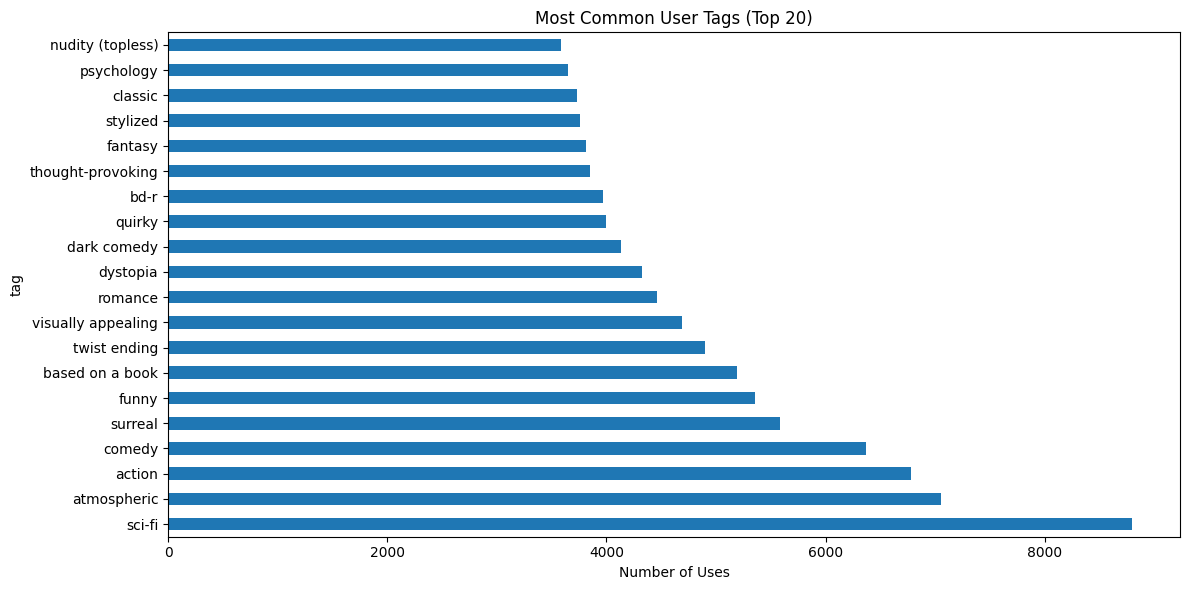

In [41]:
# Visualize
plt.figure(figsize=(12,6))
tag_freq.plot(kind='barh')
plt.xlabel('Number of Uses')
plt.title('Most Common User Tags (Top 20)')
plt.tight_layout()
plt.show()

In [42]:
# Tags per movie distribution
tags_per_movie = tags.groupby('movieId').size()
print("Tags per movie statistics:")
print(tags_per_movie.describe())

Tags per movie statistics:
count    45251.000000
mean        24.162118
std        107.208382
min          1.000000
25%          2.000000
50%          5.000000
75%         13.000000
max       6180.000000
dtype: float64


Tags created per year:
year
2005        27
2006     29238
2007     28964
2008     18687
2009     64376
2010     51189
2011     56192
2012     47596
2013     53942
2014     43905
2015    101374
2016     89956
2017     91264
2018    319688
2019     96962
dtype: int64


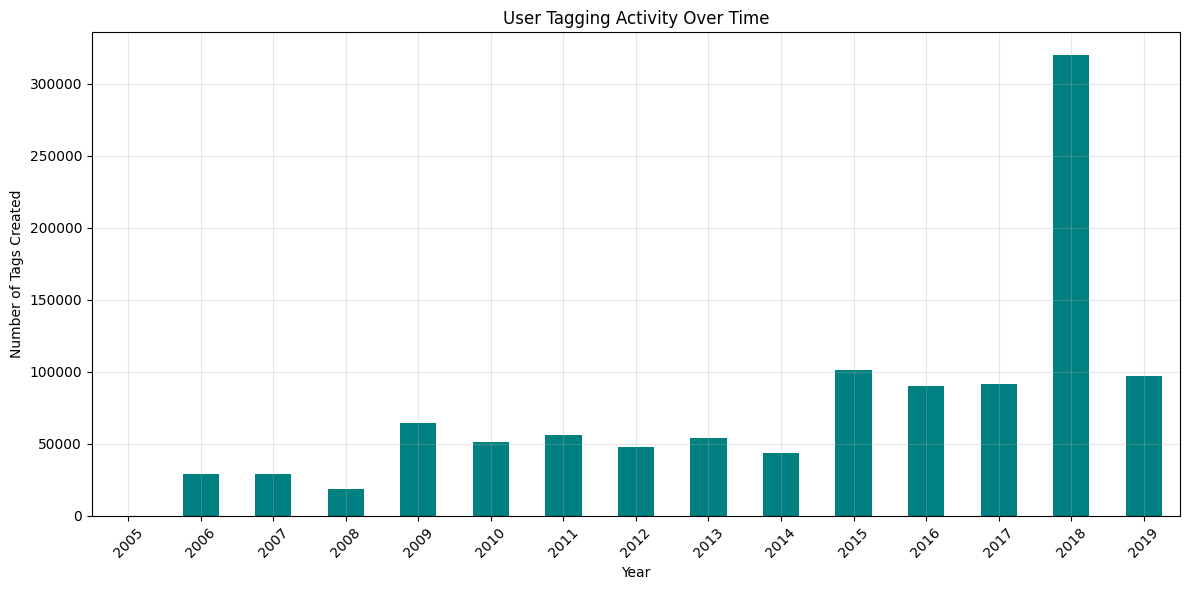

In [43]:
# Tagging behavior over time
tags_per_year = tags.groupby('year').size()
print("Tags created per year:")
print(tags_per_year)

# Visualize
plt.figure(figsize=(12,6))
tags_per_year.plot(kind='bar', color='teal')
plt.xlabel('Year')
plt.ylabel('Number of Tags Created')
plt.title('User Tagging Activity Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [44]:
# Correlation between tags and ratings
# Movies with more tags vs their rating patterns
tags_count = tags.groupby('movieId').size().reset_index(name='tag_count')
ratings_stats = ratings.groupby('movieId').agg({'rating': ['mean', 'count']}).reset_index()
ratings_stats.columns = ['movieId', 'avg_rating', 'rating_count']

tag_rating_correlation = tags_count.merge(ratings_stats, on='movieId')

In [45]:
# Calculate correlation
correlation = tag_rating_correlation[['tag_count', 'avg_rating', 'rating_count']].corr()
print("Correlation between tags and ratings:")
print(correlation)

Correlation between tags and ratings:
              tag_count  avg_rating  rating_count
tag_count      1.000000    0.147728      0.751237
avg_rating     0.147728    1.000000      0.132155
rating_count   0.751237    0.132155      1.000000


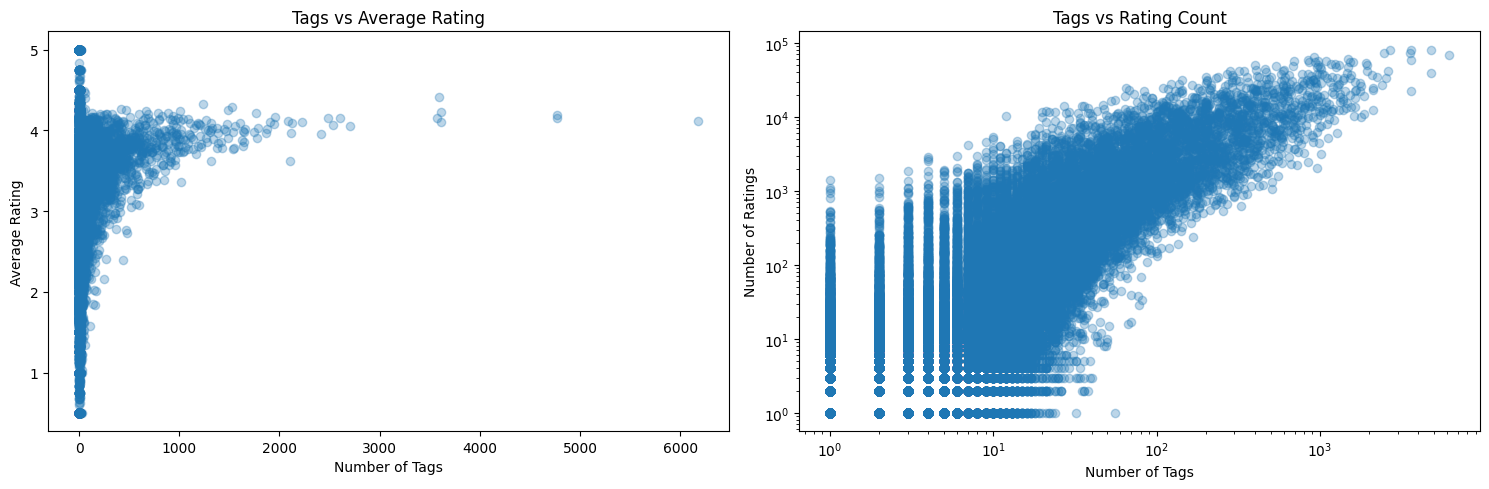

In [46]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].scatter(tag_rating_correlation['tag_count'], tag_rating_correlation['avg_rating'], alpha=0.3)
axes[0].set_xlabel('Number of Tags')
axes[0].set_ylabel('Average Rating')
axes[0].set_title('Tags vs Average Rating')

axes[1].scatter(tag_rating_correlation['tag_count'], tag_rating_correlation['rating_count'], alpha=0.3)
axes[1].set_xlabel('Number of Tags')
axes[1].set_ylabel('Number of Ratings')
axes[1].set_title('Tags vs Rating Count')
axes[1].set_yscale('log')
axes[1].set_xscale('log')
plt.tight_layout()
plt.show()

## Movie Analysis

In [47]:
# Extract release year from movie titles
import re

def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    return int(match.group(1)) if match else None

movies['release_year'] = movies['title'].apply(extract_year)
print("Release year extraction:")
print(f"Movies with release year: {movies['release_year'].notna().sum()}")
print(f"Movies without release year: {movies['release_year'].isna().sum()}")
print(f"\nRelease year range: {movies['release_year'].min():.0f} - {movies['release_year'].max():.0f}")

Release year extraction:
Movies with release year: 62013
Movies without release year: 410

Release year range: 1874 - 2019


In [48]:
# Checking titles of movies released before 1920 (out of curiosity)
old_movies = movies[movies['release_year'] < 1920]
print("Movies released before 1920:")
display(old_movies[['movieId', 'title', 'release_year']])


Movies released before 1920:


,movieId,title,release_year
2139,2230,Always Tell Your Wife (1914),1914.0
2729,2821,Male and Female (1919),1919.0
2731,2823,"Spiders Part 1: The Golden Lake, The (Die Spin...",1919.0
3039,3132,Daddy Long Legs (1919),1919.0
3216,3309,"Dog's Life, A (1918)",1918.0
...,...,...,...
62371,208921,A Street Arab (1898),1898.0
62372,208923,The Magic Book (1900),1900.0
62392,209065,Aladdin and His Wonder Lamp (1906),1906.0
62393,209067,Sousse: Marché aux charbons (avec chameaux) (1...,1896.0


In [49]:
# Checking the oldest movies in the dataset
oldest_movies = movies[movies['release_year'] == movies['release_year'].min()]
print("Oldest movies in the dataset:")
print(oldest_movies[['movieId', 'title', 'release_year']])


Oldest movies in the dataset:
       movieId                    title  release_year
35536   148054  Passage de Venus (1874)        1874.0


**A Cinematographic curiosity** : the oldest movie in the dataset 'Passade de Venus' (1874)

In the 1874 the passage of the planet Venus over the face of the sun was very popular with scientists. Many expeditions to the best viewing points in the world were organized; at least 62 parties would visit 80 locations. In preparation, much effort was made to find the best techniques to get objective and permanent records of the event. French inventor Janssen came up with the idea for a "revolver photographique". This huge camera system used a Maltese cross-type mechanism, very similar to the system that would later be used in some movie cameras and projectors. The revolver could take several dozens of exposures at regulated intervals on a Daguerreotype disc. 

Janssen went to Nagasaki (Japan), and on 9 December 1874 his crew made 47 photographs of the first contact of the transit. These were weak because of the hazy weather, but quite visible. Five English parties had also taken pictures with their own "Janssen revolvers" and reportedly had good to excellent results. The motion picture is available at this link: https://www.youtube.com/watch?v=LowU9vKZzJs and more academic knowledge is available at this link: https://articles.adsabs.harvard.edu//full/2005JHA....36...57L/0000057.000.html 


In [50]:
# Checking the average rating of the oldest movies with movie IDs and title
oldest_movie_ids = oldest_movies['movieId'].tolist()
oldest_movie_ratings = ratings[ratings['movieId'].isin(oldest_movie_ids)]

# Calculate average rating for the oldest movie
avg_rating_oldest = oldest_movie_ratings['rating'].mean()
print(f"\nAverage rating of the oldest movie(s): {avg_rating_oldest:.2f}")
print(f"Total number of ratings: {len(oldest_movie_ratings)}")



Average rating of the oldest movie(s): 3.03
Total number of ratings: 18


In [51]:
# Checking the most recent movie in the dataset
most_recent_movies = movies[movies['release_year'] == movies['release_year'].max()]
print("Most recent movies in the dataset:")
display(most_recent_movies[['movieId', 'title', 'release_year']])

Most recent movies in the dataset:


,movieId,title,release_year
25068,122914,Avengers: Infinity War - Part II (2019),2019.0
33520,143345,Shazam! (2019),2019.0
57039,195473,Les Invisibles (2019),2019.0
57371,196223,Hellboy (2019),2019.0
57462,196417,How to Train Your Dragon: The Hidden World (2019),2019.0
...,...,...,...
62387,209051,Jeff Garlin: Our Man in Chicago (2019),2019.0
62398,209085,The Mistletoe Secret (2019),2019.0
62412,209143,The Painting (2019),2019.0
62413,209145,Liberté (2019),2019.0


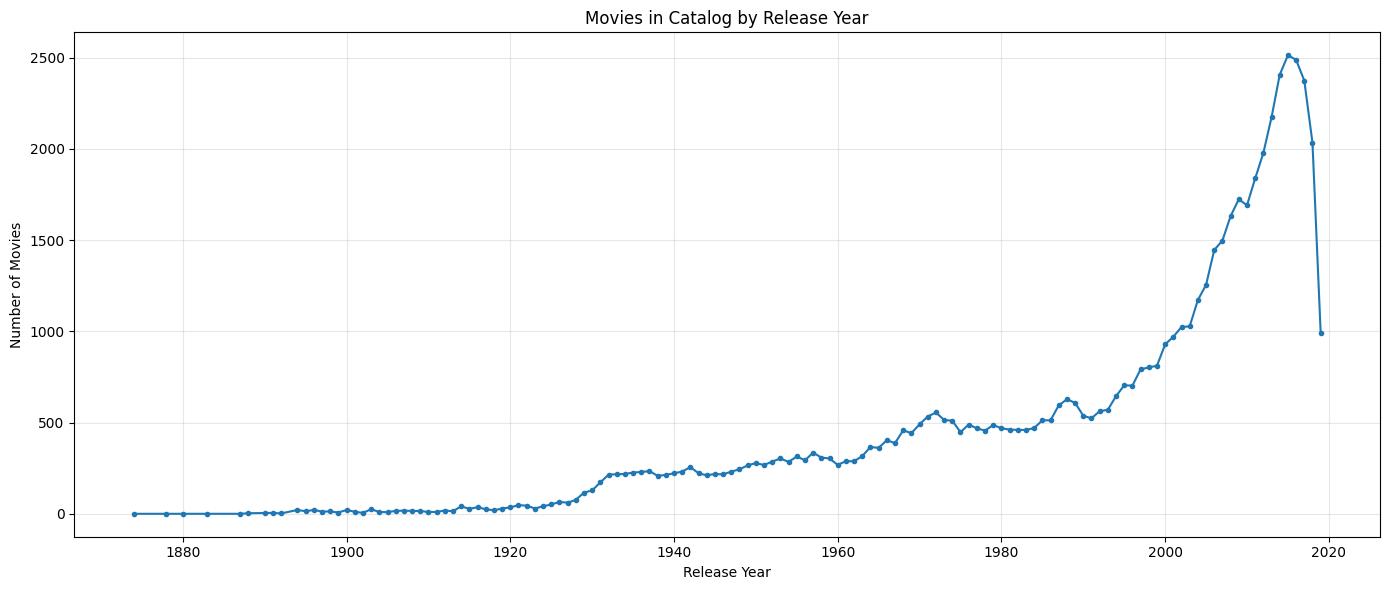

In [52]:
# Distribution of movies by release year
movies_per_year = movies['release_year'].value_counts().sort_index()
plt.figure(figsize=(14,6))
movies_per_year.plot(kind='line', marker='.')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Movies in Catalog by Release Year')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [53]:
# Most rated vs highest rated movies
movie_stats = ratings.groupby('movieId').agg({
    'rating': ['mean', 'count']
}).reset_index()
movie_stats.columns = ['movieId', 'avg_rating', 'rating_count']
movie_stats = movie_stats.merge(movies[['movieId', 'title']], on='movieId')

In [54]:
# Most rated movies
most_rated = movie_stats.nlargest(20, 'rating_count')[['title', 'rating_count', 'avg_rating']]
print("Top 20 Most Rated Movies:")
print(most_rated.to_string(index=False))

Top 20 Most Rated Movies:
                                                                         title  rating_count  avg_rating
                                                           Forrest Gump (1994)         81491    4.048011
                                              Shawshank Redemption, The (1994)         81482    4.413576
                                                           Pulp Fiction (1994)         79672    4.188912
                                              Silence of the Lambs, The (1991)         74127    4.151342
                                                            Matrix, The (1999)         72674    4.154099
                                     Star Wars: Episode IV - A New Hope (1977)         68717    4.120189
                                                          Jurassic Park (1993)         64144    3.679175
                                                       Schindler's List (1993)         60411    4.247579
                             

In [55]:
# Highest rated movies (with minimum 100 ratings)
highest_rated = movie_stats[movie_stats['rating_count'] >= 100].nlargest(20, 'avg_rating')[['title', 'avg_rating', 'rating_count']]
print("\n\nTop 20 Highest Rated Movies (min 100 ratings):")
print(highest_rated.to_string(index=False))



Top 20 Highest Rated Movies (min 100 ratings):
                                              title  avg_rating  rating_count
                             Planet Earth II (2016)    4.483096          1124
                                Planet Earth (2006)    4.464797          1747
                   Shawshank Redemption, The (1994)    4.413576         81482
                            Band of Brothers (2001)    4.398599          1356
                                             Cosmos    4.326715           277
                              Godfather, The (1972)    4.324336         52498
                              Blue Planet II (2017)    4.289833           659
                         Usual Suspects, The (1995)    4.284353         55366
                                  Twin Peaks (1989)    4.267361           288
                     Godfather: Part II, The (1974)    4.261759         34188
                        Over the Garden Wall (2013)    4.258242           546
               

In [56]:
# Rating patterns by movie release year
movie_stats_with_year = movie_stats.merge(movies[['movieId', 'release_year']], on='movieId')
release_year_stats = movie_stats_with_year.groupby('release_year').agg({
    'avg_rating': 'mean',
    'rating_count': ['sum', 'mean']
}).dropna()
release_year_stats.columns = ['avg_rating', 'total_ratings', 'avg_ratings_per_movie']

print("Rating patterns by release decade:")
print(release_year_stats.tail(10))

Rating patterns by release decade:
              avg_rating  total_ratings  avg_ratings_per_movie
release_year                                                  
2010.0          3.123972         443799             268.156495
2011.0          3.133145         369088             204.821310
2012.0          3.122527         362985             187.202166
2013.0          3.172131         341602             160.753882
2014.0          3.158244         362349             154.453964
2015.0          3.121109         293923             120.017558
2016.0          3.134078         230106              94.889072
2017.0          3.101438         170529              73.125643
2018.0          3.014278          98276              48.699703
2019.0          2.652123          27540              27.762097


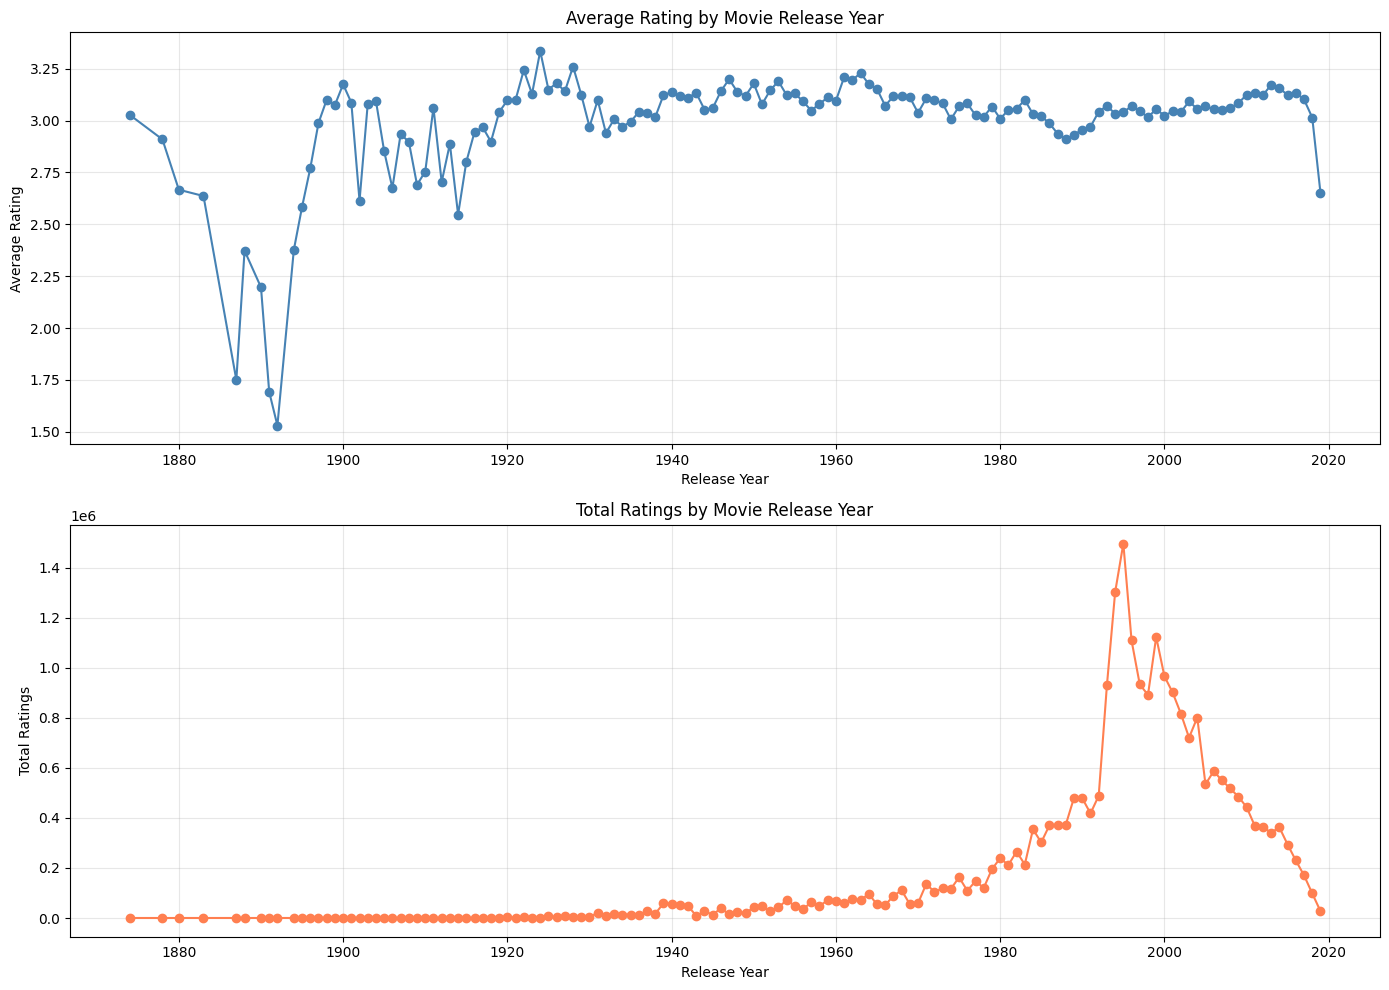

In [57]:
# Visualize
fig, axes = plt.subplots(2, 1, figsize=(14,10))

# Average rating by release year
release_year_stats['avg_rating'].plot(ax=axes[0], marker='o', color='steelblue')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Average Rating')
axes[0].set_title('Average Rating by Movie Release Year')
axes[0].grid(True, alpha=0.3)

# Total ratings by release year
release_year_stats['total_ratings'].plot(ax=axes[1], marker='o', color='coral')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Total Ratings')
axes[1].set_title('Total Ratings by Movie Release Year')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [58]:
# Movie longevity: Time span of ratings
movie_rating_timespan = ratings.groupby('movieId')['timestamp'].agg(['min', 'max'])
movie_rating_timespan['timespan_days'] = (movie_rating_timespan['max'] - movie_rating_timespan['min']).dt.days
movie_rating_timespan['timespan_years'] = movie_rating_timespan['timespan_days'] / 365.25

print("Movie rating longevity statistics:")
print(movie_rating_timespan['timespan_years'].describe())

Movie rating longevity statistics:
count    59047.000000
mean         5.339211
std          6.296065
min          0.000000
25%          0.525667
50%          2.882957
75%          8.124572
max         24.862423
Name: timespan_years, dtype: float64


In [59]:
# Movies with longest rating history
longest_history = movie_rating_timespan.nlargest(20, 'timespan_years')
longest_history = longest_history.merge(movies[['movieId', 'title']], on='movieId')
print("\nTop 20 movies with longest rating history:")
print(longest_history[['title', 'timespan_years', 'min', 'max']].to_string(index=False))


Top 20 movies with longest rating history:
                                    title  timespan_years                 min                 max
              Seven (a.k.a. Se7en) (1995)       24.862423 1995-01-09 11:46:49 2019-11-20 13:26:49
              Fish Called Wanda, A (1988)       24.856947 1995-01-09 11:46:49 2019-11-19 05:39:34
                        Get Shorty (1995)       24.854209 1995-01-09 11:46:49 2019-11-17 17:41:24
             Sense and Sensibility (1995)       23.811088 1996-01-29 00:00:00 2019-11-21 03:27:40
               Usual Suspects, The (1995)       23.811088 1996-01-29 00:00:00 2019-11-21 00:37:21
                         Toy Story (1995)       23.808350 1996-01-29 00:00:00 2019-11-20 21:23:42
                           Jumanji (1995)       23.808350 1996-01-29 00:00:00 2019-11-20 19:07:01
                        Four Rooms (1995)       23.808350 1996-01-29 00:00:00 2019-11-20 21:35:41
                           Copycat (1995)       23.808350 1996-01-29 00:00

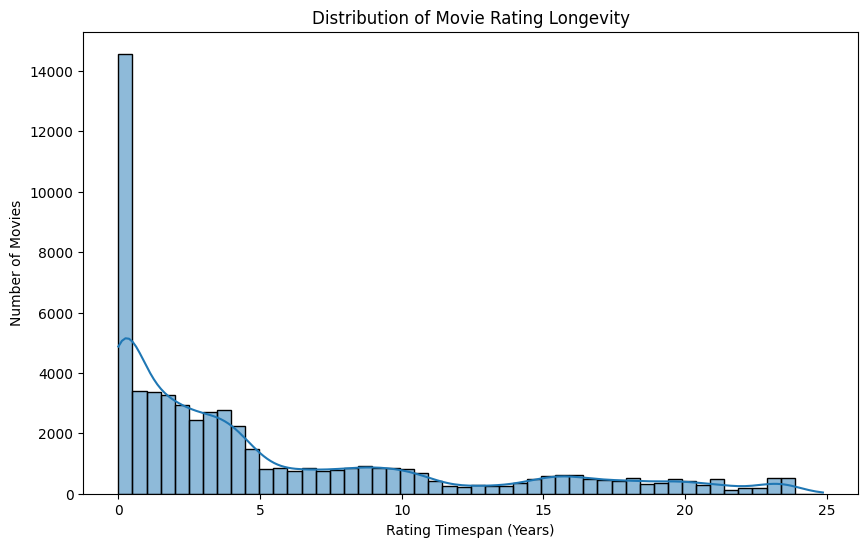

In [60]:
# Visualize
plt.figure(figsize=(10,6))
sns.histplot(movie_rating_timespan['timespan_years'], bins=50, kde=True)
plt.xlabel('Rating Timespan (Years)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Rating Longevity')
plt.show()

## User Behavior Patterns

In [61]:
# Power users vs casual users
user_rating_counts = ratings.groupby('userId').size()

In [62]:
# Define user segments
casual_users = user_rating_counts[user_rating_counts < 50]
regular_users = user_rating_counts[(user_rating_counts >= 50) & (user_rating_counts < 200)]
power_users = user_rating_counts[user_rating_counts >= 200]

print("User segmentation:")
print(f"Casual users (<50 ratings): {len(casual_users):,} ({len(casual_users)/len(user_rating_counts)*100:.1f}%)")
print(f"Regular users (50-199 ratings): {len(regular_users):,} ({len(regular_users)/len(user_rating_counts)*100:.1f}%)")
print(f"Power users (200+ ratings): {len(power_users):,} ({len(power_users)/len(user_rating_counts)*100:.1f}%)")

User segmentation:
Casual users (<50 ratings): 60,049 (36.9%)
Regular users (50-199 ratings): 69,415 (42.7%)
Power users (200+ ratings): 33,077 (20.3%)


In [63]:
# Rating contribution by segment
total_ratings = len(ratings)
print(f"\nRating contribution:")
print(f"Casual users: {casual_users.sum():,} ({casual_users.sum()/total_ratings*100:.1f}%)")
print(f"Regular users: {regular_users.sum():,} ({regular_users.sum()/total_ratings*100:.1f}%)")
print(f"Power users: {power_users.sum():,} ({power_users.sum()/total_ratings*100:.1f}%)")


Rating contribution:
Casual users: 1,892,692 (7.6%)
Regular users: 6,998,045 (28.0%)
Power users: 16,109,358 (64.4%)


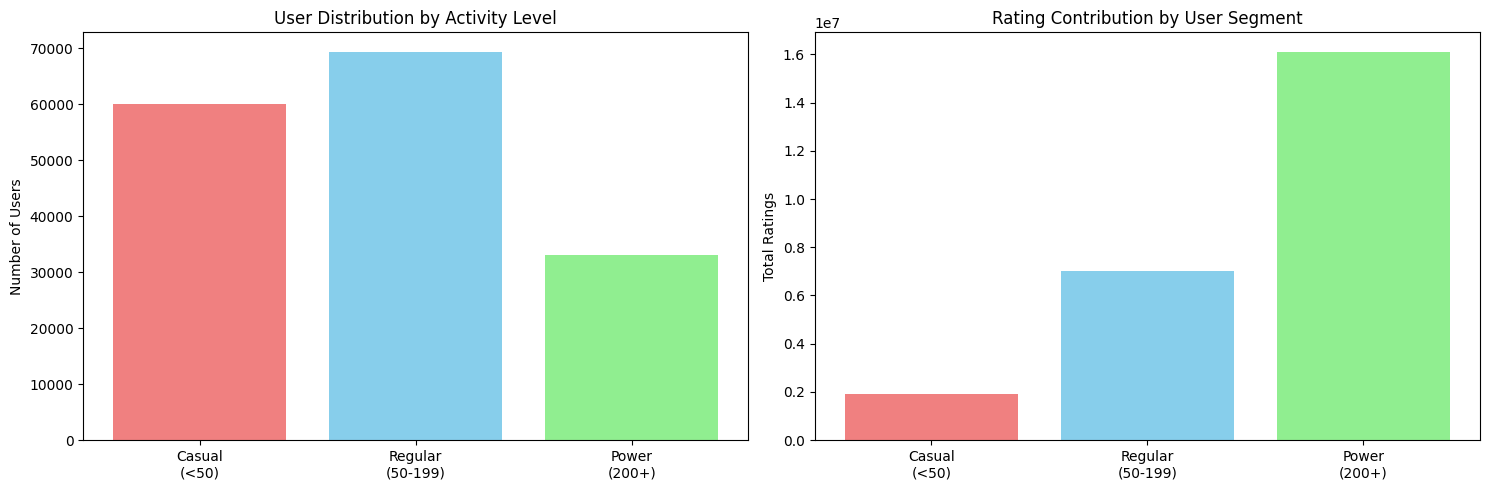

In [64]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15,5))
segments = ['Casual\n(<50)', 'Regular\n(50-199)', 'Power\n(200+)']
user_counts = [len(casual_users), len(regular_users), len(power_users)]
rating_counts = [casual_users.sum(), regular_users.sum(), power_users.sum()]

axes[0].bar(segments, user_counts, color=['lightcoral', 'skyblue', 'lightgreen'])
axes[0].set_ylabel('Number of Users')
axes[0].set_title('User Distribution by Activity Level')

axes[1].bar(segments, rating_counts, color=['lightcoral', 'skyblue', 'lightgreen'])
axes[1].set_ylabel('Total Ratings')
axes[1].set_title('Rating Contribution by User Segment')
plt.tight_layout()
plt.show()

In [65]:
# Time-of-day and day-of-week patterns
ratings['hour'] = ratings['timestamp'].dt.hour
ratings['day_of_week'] = ratings['timestamp'].dt.day_name()

# Ratings by hour of day
hourly_ratings = ratings['hour'].value_counts().sort_index()

# Ratings by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_ratings = ratings['day_of_week'].value_counts().reindex(day_order)

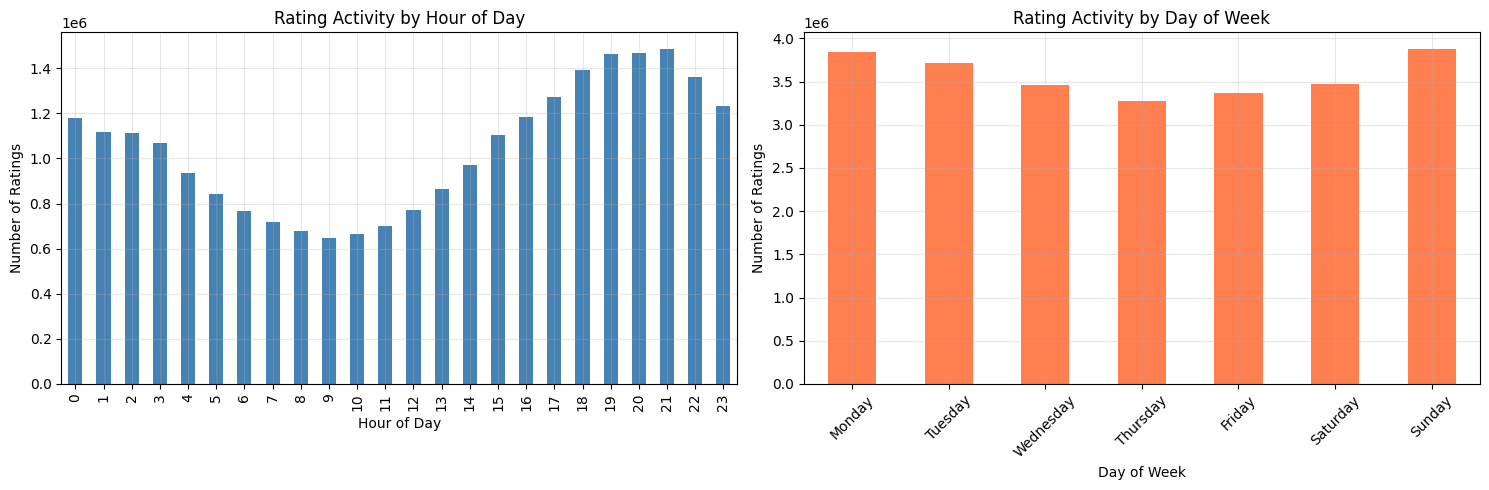

In [66]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15,5))

hourly_ratings.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Ratings')
axes[0].set_title('Rating Activity by Hour of Day')
axes[0].grid(True, alpha=0.3)

daily_ratings.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Number of Ratings')
axes[1].set_title('Rating Activity by Day of Week')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Genome Analysis

In [67]:
# Tag relevance distribution - which tags are most discriminative
tag_relevance_stats = genome_scores.groupby('tagId')['relevance'].agg(['mean', 'std', 'min', 'max'])
tag_relevance_stats = tag_relevance_stats.merge(genome_tags, on='tagId')

print("Tag relevance statistics:")
print(tag_relevance_stats.describe())

Tag relevance statistics:
             tagId         mean          std          min          max
count  1128.000000  1128.000000  1128.000000  1128.000000  1128.000000
mean    564.500000     0.116368     0.114600     0.013317     0.972447
std     325.769857     0.091890     0.047910     0.023863     0.051249
min       1.000000     0.004099     0.020654     0.000250     0.482750
25%     282.750000     0.048828     0.078488     0.003000     0.972500
50%     564.500000     0.088308     0.111621     0.006000     0.991000
75%     846.250000     0.156003     0.148335     0.014250     0.997250
max    1128.000000     0.724424     0.283179     0.412000     1.000000


In [68]:
# Most discriminative tags (highest standard deviation)
most_discriminative = tag_relevance_stats.nlargest(20, 'std')[['tag', 'mean', 'std']]
print("\nTop 20 most discriminative tags (highest variance):")
print(most_discriminative.to_string(index=False))


Top 20 most discriminative tags (highest variance):
             tag     mean      std
          comedy 0.239421 0.283179
          action 0.260527 0.252778
   relationships 0.296697 0.241436
          horror 0.122162 0.240154
           tense 0.234866 0.239837
independent film 0.306364 0.236446
        intimate 0.252358 0.234689
       criterion 0.390640 0.234280
           drama 0.381268 0.233259
        violence 0.292113 0.233062
          murder 0.274374 0.232064
        suspense 0.344285 0.229672
 based on a book 0.258643 0.228636
           funny 0.198510 0.221485
        dramatic 0.279123 0.219856
           bleak 0.217298 0.218556
      loneliness 0.294322 0.217644
       obsession 0.278064 0.216754
          family 0.308798 0.216621
       enigmatic 0.322862 0.215876


In [69]:
# Least discriminative tags (lowest standard deviation)
least_discriminative = tag_relevance_stats.nsmallest(20, 'std')[['tag', 'mean', 'std']]
print("\nTop 20 least discriminative tags (lowest variance):")
print(least_discriminative.to_string(index=False))


Top 20 least discriminative tags (lowest variance):
                                        tag     mean      std
                                neil gaiman 0.011965 0.020654
                            hannibal lecter 0.004099 0.021049
                             figure skating 0.010753 0.021384
                              robert ludlum 0.013583 0.023815
                              truman capote 0.029529 0.023831
                                    tolkien 0.015578 0.024904
                                 roald dahl 0.018994 0.025403
                                  neo-nazis 0.012583 0.025839
                             sophia coppola 0.019377 0.027411
                                      spock 0.022427 0.027627
                               chris tucker 0.015400 0.027934
                                    aardman 0.007595 0.028560
                                   alcatraz 0.016598 0.029184
easily confused with other movie(s) (title) 0.050597 0.029709
                 

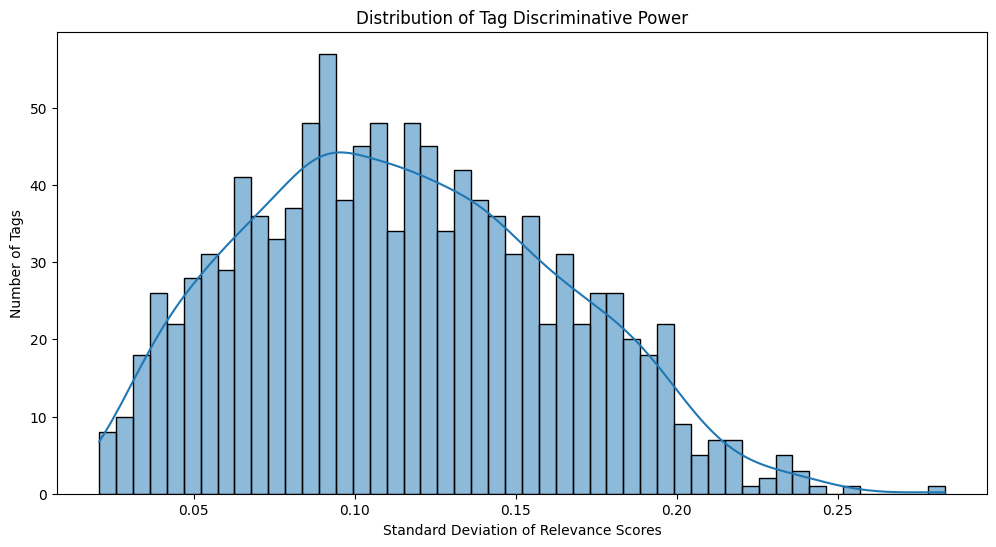

In [70]:
# Visualize
plt.figure(figsize=(12,6))
sns.histplot(tag_relevance_stats['std'], bins=50, kde=True)
plt.xlabel('Standard Deviation of Relevance Scores')
plt.ylabel('Number of Tags')
plt.title('Distribution of Tag Discriminative Power')
plt.show()

In [71]:
# Correlation between genome scores and ratings
# Sample movies for analysis (to manage memory)
sample_movies = ratings['movieId'].value_counts().head(1000).index

# Get genome features for sample movies
genome_pivot = genome_scores[genome_scores['movieId'].isin(sample_movies)].pivot(
    index='movieId', columns='tagId', values='relevance'
)

# Get average ratings for these movies
movie_avg_ratings = ratings[ratings['movieId'].isin(sample_movies)].groupby('movieId')['rating'].mean()

# Align the data
common_movies = genome_pivot.index.intersection(movie_avg_ratings.index)
genome_features = genome_pivot.loc[common_movies]
movie_ratings = movie_avg_ratings.loc[common_movies]

# Calculate correlation for each tag
tag_correlations = genome_features.corrwith(movie_ratings).sort_values(ascending=False)
tag_correlations_with_names = tag_correlations.to_frame('correlation').merge(
    genome_tags, left_index=True, right_on='tagId'
)[['tag', 'correlation']].dropna()

print("Tags most positively correlated with high ratings:")
print(tag_correlations_with_names.head(15).to_string(index=False))

print("\nTags most negatively correlated with ratings (associated with lower ratings):")
print(tag_correlations_with_names.tail(15).to_string(index=False))

Tags most positively correlated with high ratings:
                   tag  correlation
    suprisingly clever     0.825770
    movielens top pick     0.795115
          imdb top 250     0.780426
                 talky     0.768579
unusual plot structure     0.744047
            melancholy     0.724113
      excellent script     0.722829
           good acting     0.717698
           interesting     0.696286
oscar (best directing)     0.690474
           masterpiece     0.687204
          storytelling     0.678578
          great acting     0.672703
             very good     0.672349
              idealism     0.667858

Tags most negatively correlated with ratings (associated with lower ratings):
              tag  correlation
          bad cgi    -0.483591
 natural disaster    -0.505415
 so bad it's good    -0.506159
       ridiculous    -0.529551
           stupid    -0.540210
            silly    -0.540298
        silly fun    -0.569007
         disaster    -0.570432
              b

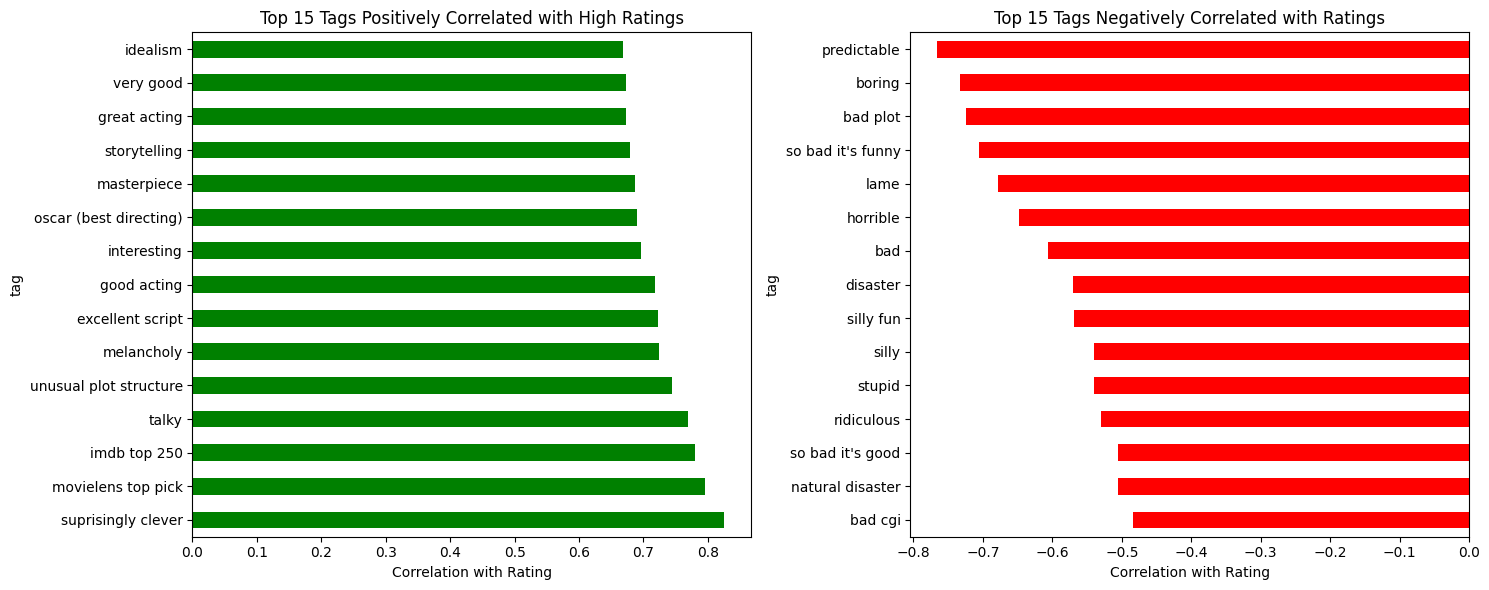

In [72]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15,6))
tag_correlations_with_names.head(15).plot(x='tag', y='correlation', kind='barh', ax=axes[0], color='green', legend=False)
axes[0].set_xlabel('Correlation with Rating')
axes[0].set_title('Top 15 Tags Positively Correlated with High Ratings')

tag_correlations_with_names.tail(15).plot(x='tag', y='correlation', kind='barh', ax=axes[1], color='red', legend=False)
axes[1].set_xlabel('Correlation with Rating')
axes[1].set_title('Top 15 Tags Negatively Correlated with Ratings')
plt.tight_layout()
plt.show()

## Cross-Dataset Relationships

In [73]:
# Do highly-tagged movies get more ratings?
tags_per_movie_count = tags.groupby('movieId').size().reset_index(name='tag_count')
ratings_per_movie_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

tag_vs_rating = tags_per_movie_count.merge(ratings_per_movie_count, on='movieId', how='outer').fillna(0)

# Calculate correlation
correlation = tag_vs_rating[['tag_count', 'rating_count']].corr().iloc[0, 1]
print(f"Correlation between tag count and rating count: {correlation:.4f}")

Correlation between tag count and rating count: 0.7548


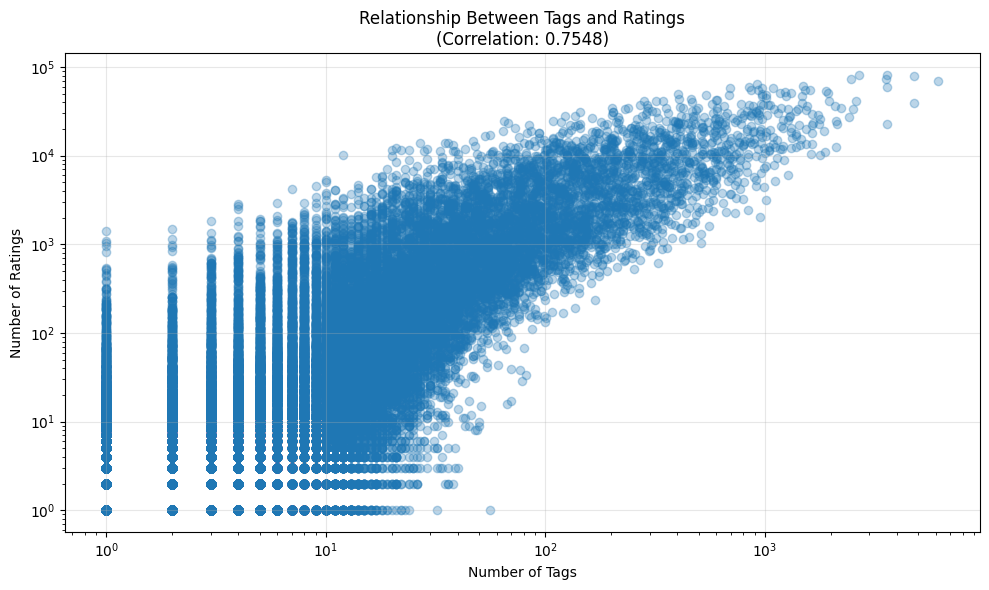


Top 10 most tagged movies:
                                       title  tag_count  rating_count
   Star Wars: Episode IV - A New Hope (1977)     6180.0       68717.0
                         Pulp Fiction (1994)     4767.0       79672.0
                            Inception (2010)     4767.0       38895.0
                         Interstellar (2014)     3616.0       22634.0
                           Fight Club (1999)     3612.0       58773.0
            Shawshank Redemption, The (1994)     3597.0       81482.0
                          Matrix, The (1999)     3573.0       72674.0
                         Forrest Gump (1994)     2701.0       81491.0
                              Memento (2000)     2601.0       41195.0
Eternal Sunshine of the Spotless Mind (2004)     2533.0       33225.0


In [74]:
# Visualize
plt.figure(figsize=(10,6))
plt.scatter(tag_vs_rating['tag_count'], tag_vs_rating['rating_count'], alpha=0.3)
plt.xlabel('Number of Tags')
plt.ylabel('Number of Ratings')
plt.title(f'Relationship Between Tags and Ratings\n(Correlation: {correlation:.4f})')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Movies with many tags
highly_tagged = tag_vs_rating.nlargest(10, 'tag_count').merge(movies[['movieId', 'title']], on='movieId')
print("\nTop 10 most tagged movies:")
print(highly_tagged[['title', 'tag_count', 'rating_count']].to_string(index=False))

In [75]:
# IMDb and TMDb coverage analysis
print("External ID coverage:")
print(f"Movies with IMDb ID: {links['imdbId'].notna().sum():,} ({links['imdbId'].notna().sum()/len(links)*100:.1f}%)")
print(f"Movies with TMDb ID: {links['tmdbId'].notna().sum():,} ({links['tmdbId'].notna().sum()/len(links)*100:.1f}%)")
print(f"Movies with both IDs: {(links['imdbId'].notna() & links['tmdbId'].notna()).sum():,}")
print(f"Movies with neither ID: {(links['imdbId'].isna() & links['tmdbId'].isna()).sum():,}")

External ID coverage:
Movies with IMDb ID: 62,423 (100.0%)
Movies with TMDb ID: 62,316 (99.8%)
Movies with both IDs: 62,316
Movies with neither ID: 0


In [76]:
# Check which movies are missing external IDs
movies_with_links = movies.merge(links, on='movieId', how='left')
missing_both = movies_with_links[(movies_with_links['imdbId'].isna()) & (movies_with_links['tmdbId'].isna())]

if len(missing_both) > 0:
    print(f"\nMovies missing both external IDs: {len(missing_both)}")
    print("Sample of movies without external IDs:")
    print(missing_both[['title', 'genres']].head(10).to_string(index=False))

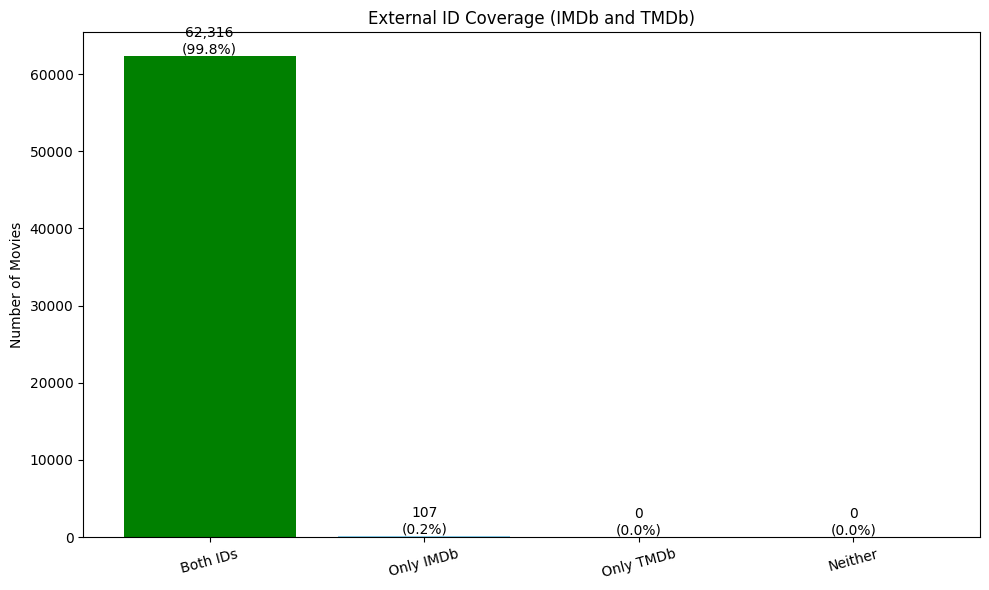

In [77]:
# Visualize coverage
coverage_data = {
    'Both IDs': (links['imdbId'].notna() & links['tmdbId'].notna()).sum(),
    'Only IMDb': (links['imdbId'].notna() & links['tmdbId'].isna()).sum(),
    'Only TMDb': (links['imdbId'].isna() & links['tmdbId'].notna()).sum(),
    'Neither': (links['imdbId'].isna() & links['tmdbId'].isna()).sum()
}

plt.figure(figsize=(10,6))
plt.bar(coverage_data.keys(), coverage_data.values(), color=['green', 'skyblue', 'coral', 'lightgray'])
plt.ylabel('Number of Movies')
plt.title('External ID Coverage (IMDb and TMDb)')
plt.xticks(rotation=15)
for i, (k, v) in enumerate(coverage_data.items()):
    plt.text(i, v, f'{v:,}\n({v/len(links)*100:.1f}%)', ha='center', va='bottom')
plt.tight_layout()
plt.show()

## Summary of Key Findings

This exploratory data analysis has revealed important insights about the MovieLens 25M dataset that will inform the data preparation for recommendation algorithms:

- **Data Quality**: The dataset is well-structured with minimal missing values
- **Rating Sparsity**: The user-movie rating matrix is highly sparse, which will influence algorithm choice
- **User Behavior**: Power users contribute significantly more ratings than casual users
- **Temporal Patterns**: Rating activity has clear temporal trends worth considering
- **Genre Insights**: Certain genres consistently receive higher ratings than others
- **Movie Popularity**: There's a strong long-tail distribution - few movies are extremely popular
- **Tag Utility**: User tags and genome scores provide rich additional features for content-based filtering
- **External Links**: Good coverage of IMDb and TMDb IDs enables potential data enrichment

These findings will guide the data preparation strategy in the next notebook.